# 用箱线图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/问卷调查结果3.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath, index_col='调查用户')

# 定义画图用的数据
labels = df.columns
data = df.values

### 3. 开始画图

用「**面向对象**」的方法画图。

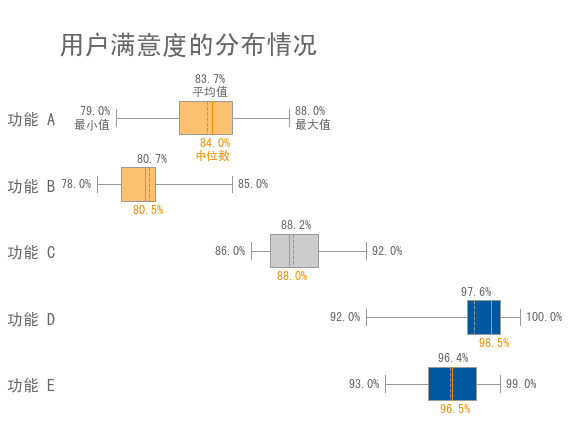

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(8, 6))

# 设置背景颜色
fig.set_facecolor('w')
ax.set_facecolor('w')

# 设置箱体的属性
boxprops = {'color':c['灰色']}
# 设置中位线参数
medianprops = {'color':c['橙色']}
# 设置均值的属性
meanprops = {'color':c['灰色']}
# 设置箱线图顶端和末端线条的属性
capprops = {'color':c['灰色']}
# 设置须线的属性
whiskerprops = {'color':c['灰色']}

# 绘制箱线图，whis 用来控制箱须包含数据的范围，这里设置得比较大，是为了不让图中出现异常点
bplot = ax.boxplot(data, vert=False, patch_artist=True, labels=labels, showmeans=True, whis=5, meanline=True, 
                   boxprops=boxprops, medianprops=medianprops, meanprops=meanprops, capprops=capprops, whiskerprops=whiskerprops)

# 设置标题
ax.set_title('\n用户满意度的分布情况\n', loc='left', size=26, color=c['深灰色'])

# 倒转 Y 轴，让第一个功能排在最上面
ax.invert_yaxis()

# 隐藏 Y 轴的刻度线
ax.tick_params(axis='y', which='major', length=0)

# 设置 X 轴范围
ax.set_xlim(0.76, 1.02)

# 隐藏 X 轴
ax.xaxis.set_visible(False)

# 标记箱线代表的含义
ax.text(min(data[:,0]), 1, '%.1f%% '%(min(data[:,0])*100)+'\n最小值 ', ha='right', fontsize=12, color=c['深灰色'], va='center')
ax.text(np.mean(data[:,0]), 0.7, ' %.1f%%'%(np.mean(data[:,0])*100)+'\n 平均值', ha='center', fontsize=12, color=c['深灰色'], va='bottom')
ax.text(np.median(data[:,0]), 1.3, ' %.1f%%'%(np.median(data[:,0])*100)+'\n中位数', ha='center', fontsize=12, color=c['橙色'], va='top')
ax.text(max(data[:,0]), 1, ' %.1f%%'%(max(data[:,0])*100)+'\n 最大值', ha='left', fontsize=12, color=c['深灰色'], va='center')

# 循环添加数据标签
for i in range(1, len(labels)):
    ax.text(min(data[:,i]), i+1, '%.1f%% '%(min(data[:,i])*100), ha='right', fontsize=12, color=c['深灰色'], va='center')
    ax.text(np.mean(data[:,i]), i+0.7, ' %.1f%%'%(np.mean(data[:,i])*100), ha='center', fontsize=12, color=c['深灰色'], va='bottom')
    ax.text(np.median(data[:,i]), i+1.3, ' %.1f%%'%(np.median(data[:,i])*100), ha='center', fontsize=12, color=c['橙色'], va='top')
    ax.text(max(data[:,i]), i+1, ' %.1f%%'%(max(data[:,i])*100), ha='left', fontsize=12, color=c['深灰色'], va='center')

# 填充箱体的颜色
colors = [c['浅橙色'], c['浅橙色'], c['浅灰色'], c['蓝色'], c['蓝色']]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

# 用百分比格式显示坐标轴
def to_percent(temp, position=1):
    return '%.0f'%(100 * temp) + '%'
formatter = mpl.ticker.FuncFormatter(to_percent)
ax.xaxis.set_major_formatter(formatter)

plt.savefig('用户满意度的分布情况.jpeg')

plt.show()